# Previsão de renda

### 4 elementos importantes
- Esse notebook
- Streamlit com as análises
- Seu Github com o projeto
- Vídeo no readme do github mostrando o streamlit

## Etapa 1 CRISP - DM: Entendimento do negócio

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.


## Etapa 2 Crisp-DM: Entendimento dos dados
A segunda etapa do CRISP-DM é o Entendimento dos Dados , que tem como objetivo explorar, compreender e avaliar a qualidade dos dados disponíveis. Essa fase é essencial para garantir que os dados sejam adequados para atender aos objetivos do projeto definidos na etapa anterior.

Vamos detalhar como essa etapa pode ser conduzida no contexto do problema de concessão de cartões de crédito, considerando o dicionário de dados fornecido.


### Dicionário de dados <a name="dicionario"></a>

Os dados estão dispostos em uma tabela com uma linha para cada cliente, e uma coluna para cada variável armazenando as características desses clientes. Colocamos uma cópia o dicionário de dados (explicação dessas variáveis) abaixo neste notebook:

| Variável              | Descrição                                                                                                  | Tipo             |
| --------------------- |:----------------------------------------------------------------------------------------------------------:| ----------------:|
| data_ref              | Data de referência de coleta das variáveis                                                                 | object           |
| id_cliente            | Código identificador exclusivo do cliente                                                                  | int              |
| sexo                  | Sexo do cliente (M = 'Masculino'; F = 'Feminino')                                                          | object (binária) |
| posse_de_veiculo      | Indica se o cliente possui veículo (True = 'Possui veículo'; False = 'Não possui veículo')                 | bool (binária)   |
| posse_de_imovel       | Indica se o cliente possui imóvel (True = 'Possui imóvel'; False = 'Não possui imóvel')                    | bool (binária)   |
| qtd_filhos            | Quantidade de filhos do cliente                                                                            | int              |
| tipo_renda            | Tipo de renda do cliente (Empresário, Assalariado, Servidor público, Pensionista, Bolsista)                | object           |
| educacao              | Grau de instrução do cliente (Primário, Secundário, Superior incompleto, Superior completo, Pós graduação) | object           |
| estado_civil          | Estado civil do cliente (Solteiro, União, Casado, Separado, Viúvo)                                         | object           |
| tipo_residencia       | Tipo de residência do cliente (Casa, Governamental, Com os pais, Aluguel, Estúdio, Comunitário)            | object           |
| idade                 | Idade do cliente em anos                                                                                   | int              |
| tempo_emprego         | Tempo no emprego atual                                                                                     | float            |
| qt_pessoas_residencia | Quantidade de pessoas que moram na residência                                                              | float            |
| **renda**             | Valor numérico decimal representando a renda do cliente em reais                                           | float            |

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

#### Carregando os pacotes
É considerado uma boa prática carregar os pacotes que serão utilizados como a primeira coisa do programa.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from ydata_profiling import ProfileReport
import os

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

%matplotlib inline

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

#### Carregando os dados
O comando pd.read_csv é um comando da biblioteca pandas (pd.) e carrega os dados do arquivo csv indicado para um objeto *dataframe* do pandas.

In [4]:
renda = pd.read_csv('./input/previsao_de_renda.csv')

In [5]:
renda.drop(labels='Unnamed: 0', axis = 1, inplace=True)

In [6]:
renda.info()
renda

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   data_ref               15000 non-null  object 
 1   id_cliente             15000 non-null  int64  
 2   sexo                   15000 non-null  object 
 3   posse_de_veiculo       15000 non-null  bool   
 4   posse_de_imovel        15000 non-null  bool   
 5   qtd_filhos             15000 non-null  int64  
 6   tipo_renda             15000 non-null  object 
 7   educacao               15000 non-null  object 
 8   estado_civil           15000 non-null  object 
 9   tipo_residencia        15000 non-null  object 
 10  idade                  15000 non-null  int64  
 11  tempo_emprego          12427 non-null  float64
 12  qt_pessoas_residencia  15000 non-null  float64
 13  renda                  15000 non-null  float64
dtypes: bool(2), float64(3), int64(3), object(6)
memory usa

,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,2016-03-01,16006,F,False,True,0,Empresário,Secundário,Solteiro,Casa,48,13.887671,1.0,7990.58
14996,2016-03-01,3722,F,False,True,0,Pensionista,Superior completo,Solteiro,Casa,57,NaN,1.0,10093.45
14997,2016-03-01,6194,F,True,True,0,Assalariado,Superior completo,Casado,Casa,45,7.832877,2.0,604.82
14998,2016-03-01,4922,M,True,False,0,Empresário,Superior completo,Casado,Casa,36,4.298630,2.0,3352.27


In [7]:
renda.nunique()

data_ref                   15
id_cliente               9845
sexo                        2
posse_de_veiculo            2
posse_de_imovel             2
qtd_filhos                  8
tipo_renda                  5
educacao                    5
estado_civil                5
tipo_residencia             6
idade                      47
tempo_emprego            2589
qt_pessoas_residencia       9
renda                    9786
dtype: int64

In [8]:
# Verifica e remove colunas se existirem
colunas_para_remover = ['Unnamed: 0', 'id_cliente']
colunas_existentes = renda.columns
colunas_para_remover = [coluna for coluna in colunas_para_remover if coluna in colunas_existentes]
renda.drop(columns=colunas_para_remover, inplace=True)

print('Quantidade total de linhas:', len(renda), '\n')

print('Quantidade de linhas duplicadas:', renda.duplicated().sum(), '\n')

print('Quantidade após remoção das linhas duplicadas:', len(renda.drop_duplicates()), '\n')

# Remove duplicatas e redefine o índice
renda.drop_duplicates(inplace=True, ignore_index=True)

# Verifica dados faltantes
print('Quantidade de dados faltantes por coluna:')
print(renda.isnull().sum())

# Exibe informações do DataFrame
renda.info()

Quantidade total de linhas: 15000 

Quantidade de linhas duplicadas: 407 

Quantidade após remoção das linhas duplicadas: 14593 

Quantidade de dados faltantes por coluna:
data_ref                    0
sexo                        0
posse_de_veiculo            0
posse_de_imovel             0
qtd_filhos                  0
tipo_renda                  0
educacao                    0
estado_civil                0
tipo_residencia             0
idade                       0
tempo_emprego            2503
qt_pessoas_residencia       0
renda                       0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14593 entries, 0 to 14592
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   data_ref               14593 non-null  object 
 1   sexo                   14593 non-null  object 
 2   posse_de_veiculo       14593 non-null  bool   
 3   posse_de_imovel        14593 non-null  bool   
 4  

#### Entendimento dos dados - Univariada
Nesta etapa tipicamente avaliamos a distribuição de todas as variáveis. 

#### Pandas Profiling – Relatório interativo para análise exploratória de dados

In [9]:
# Cria o relatório de perfil
prof = ProfileReport(df=renda, 
                     minimal=False, 
                     explorative=True)

# Cria o diretório de saída se ele não existir
os.makedirs(name='./output', exist_ok=True)

# Salva o relatório em um arquivo HTML
output_path = './output/renda_analysis.html'
prof.to_file(output_path)

# Verifica se o arquivo foi criado com sucesso
if os.path.exists(output_path):
    print(f"Relatório salvo com sucesso em: {output_path}")
else:
    print("Erro ao salvar o relatório.")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 118.67it/s]

Relatório salvo com sucesso em: ./output/renda_analysis.html


####  Estatísticas descritivas das variáveis quantitativas

In [10]:
renda.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
qtd_filhos,14593.0,0.433290,0.746029,0.000000,0.000000,0.000000,1.000000,14.000000
idade,14593.0,43.868910,11.276626,22.000000,34.000000,43.000000,53.000000,68.000000
tempo_emprego,12090.0,7.724567,6.718007,0.117808,3.006164,6.013699,10.123288,42.906849
qt_pessoas_residencia,14593.0,2.207086,0.909117,1.000000,2.000000,2.000000,3.000000,15.000000
renda,14593.0,5698.140557,8314.021152,118.710000,2018.880000,3488.410000,6379.570000,245141.670000


### Entendimento dos dados - Bivariadas

#### Matriz de correlação

In [11]:
renda_numerico = renda.iloc[:, 3:].select_dtypes(include=np.number)

# Calcula a correlação
correlacao = renda_numerico.corr()

# Seleciona a última linha
ultima_linha_correlacao = correlacao.tail(n=1)

print(ultima_linha_correlacao)

       qtd_filhos     idade  tempo_emprego  qt_pessoas_residencia  renda
renda    0.030296  0.023445       0.385014               0.048616    1.0


A partir da matriz de correlação, é possível observar que a variável que apresenta maior relação com a varíavel `renda` é `tempo_emprego`, com um índice de correlação de 38,5%.

#### Matriz de dispersão

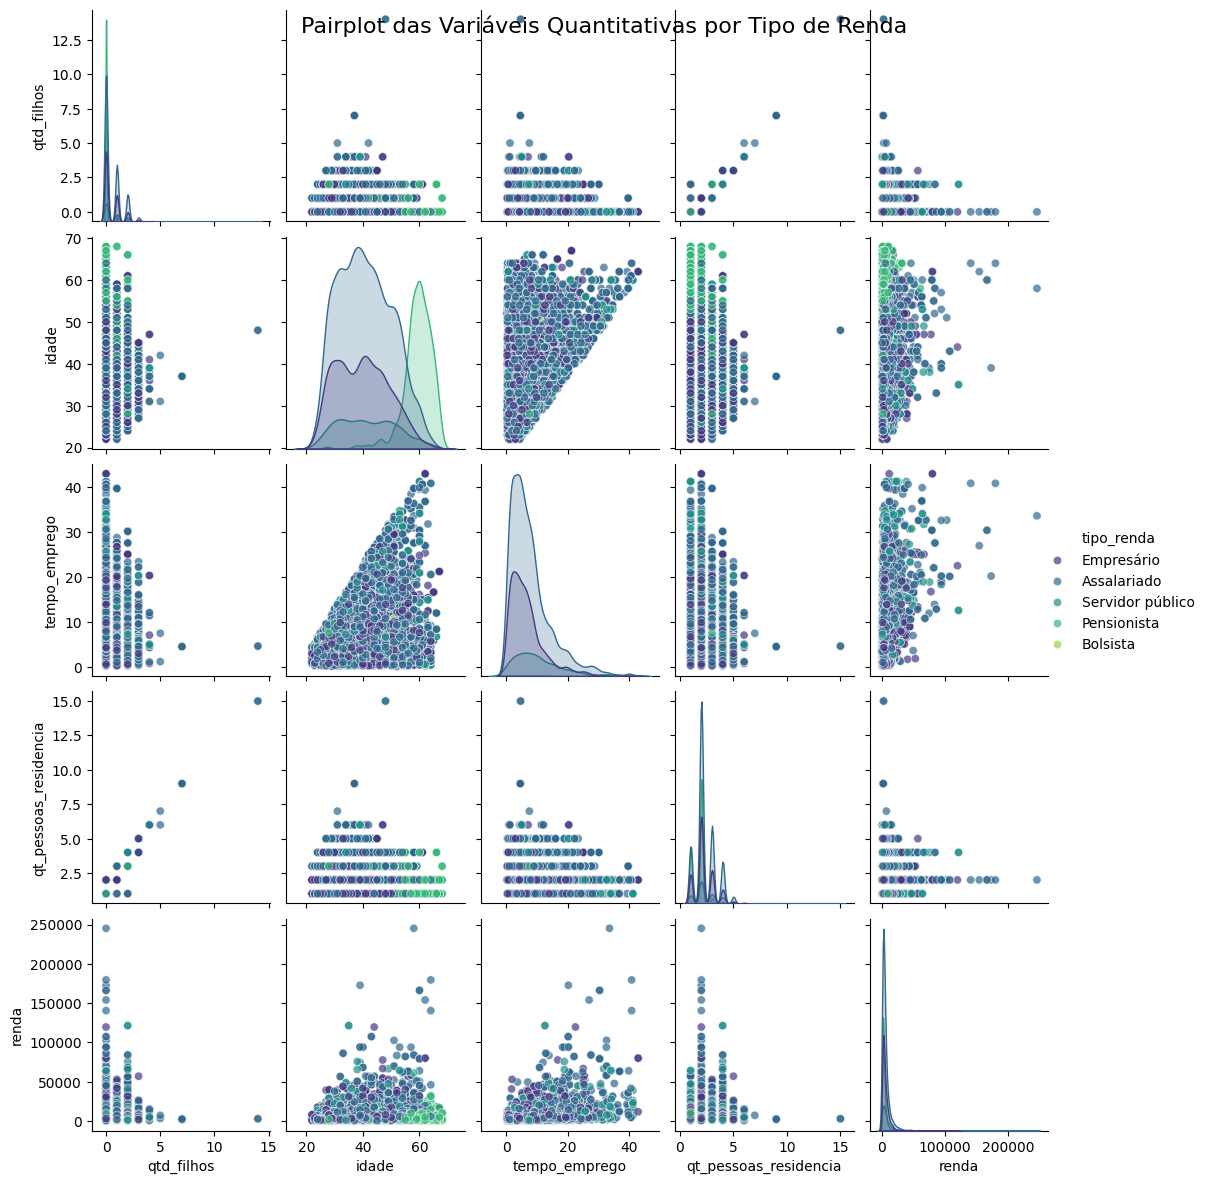

In [12]:
# Personalização do pairplot
sns.pairplot(data=renda, 
             hue='tipo_renda', 
             vars=['qtd_filhos', 'idade', 'tempo_emprego', 'qt_pessoas_residencia', 'renda'], 
             diag_kind='kde', # ou 'hist'
             palette='viridis', # Escolha uma paleta de cores
             plot_kws={'alpha': 0.7}) # Ajuste a transparência dos pontos

# Adicionando título ao gráfico
plt.suptitle('Pairplot das Variáveis Quantitativas por Tipo de Renda', fontsize=16)

# Ajustando o tamanho da figura (opcional)
plt.gcf().set_size_inches(12, 12)

# Exibindo o gráfico
#plt.show() # Não necessário em Jupyter Notebook